# Support Vector Machines

In [62]:
#Scale the data
X_train_validation_scaled = preprocessing.scale(X_train_validation)

SVM takes a long time to fit, especially when a gaussian kernel is used. We will look at the training and validation errors to understand how many samples are enough to minimize the error. We can use the plot_learning_curve function which can be found at http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#example-model-selection-plot-learning-curve-py

In [63]:
#This is the plot_learning_curve function that can be found at:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#example-model-selection-plot-learning-curve-py
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 0.3, 5),scoring = None):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,scoring = scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

We are going to use 10 samples of increasing size, from 1% of the sample to 80% of the sample and plot the training and validation scores.

<module 'matplotlib.pyplot' from 'C:\Users\Mustafa\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

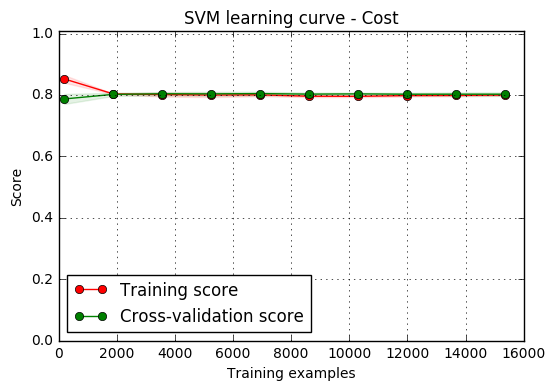

In [64]:
classifier_svm = svm.LinearSVC(C = 10, penalty='l1',dual = False) 
plot_learning_curve(classifier_svm, "SVM learning curve - Cost",
                    X_train_validation_scaled, y_train_validation, cv = cv,
                    train_sizes=np.linspace(0.01, 0.8, 10),ylim=(0.0, 1.01),scoring = None) 

The plot suggests that a sample size of 3,000 should be enough to train a SVM.

In [65]:
#Insert the parameter ranges we want to evaluate
hyper_parameters_svm = [{'kernel':['linear','rbf'],'C':[0.1,1,10]}]

-2111.667 (+/-512.181) for {'kernel': 'linear', 'C': 0.1}
-1950.000 (+/-465.329) for {'kernel': 'rbf', 'C': 0.1}
-2125.000 (+/-510.103) for {'kernel': 'linear', 'C': 1}
-1975.000 (+/-458.541) for {'kernel': 'rbf', 'C': 1}
-2135.000 (+/-535.900) for {'kernel': 'linear', 'C': 10}
-2146.667 (+/-359.167) for {'kernel': 'rbf', 'C': 10}
('SVM ', 0, 'best parameters', 'true values 0.212')
({'kernel': 'rbf', 'C': 0.1}, 'max score', 0)
-2226.667 (+/-325.426) for {'kernel': 'linear', 'C': 0.1}
-2238.333 (+/-336.989) for {'kernel': 'rbf', 'C': 0.1}
-2233.333 (+/-308.897) for {'kernel': 'linear', 'C': 1}
-2073.333 (+/-282.140) for {'kernel': 'rbf', 'C': 1}
-2246.667 (+/-320.900) for {'kernel': 'linear', 'C': 10}
-2176.667 (+/-238.794) for {'kernel': 'rbf', 'C': 10}
('SVM ', 1, 'best parameters', 'true values 0.223')
({'kernel': 'rbf', 'C': 1}, 'max score', 0)
-2301.667 (+/-196.850) for {'kernel': 'linear', 'C': 0.1}
-2178.333 (+/-194.054) for {'kernel': 'rbf', 'C': 0.1}
-2326.667 (+/-122.042) for 

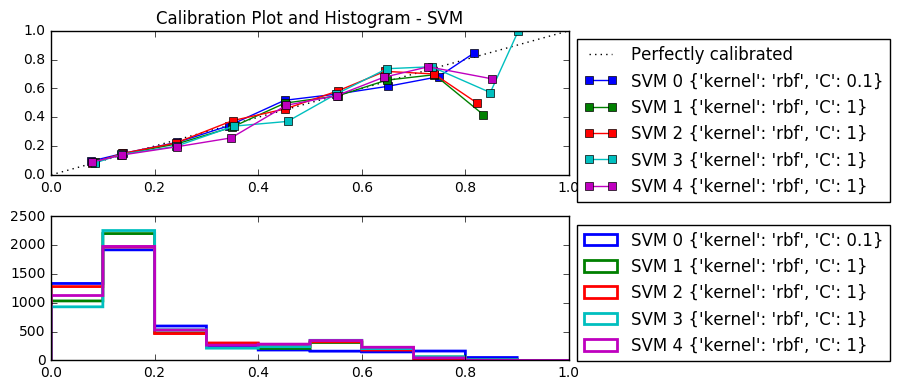

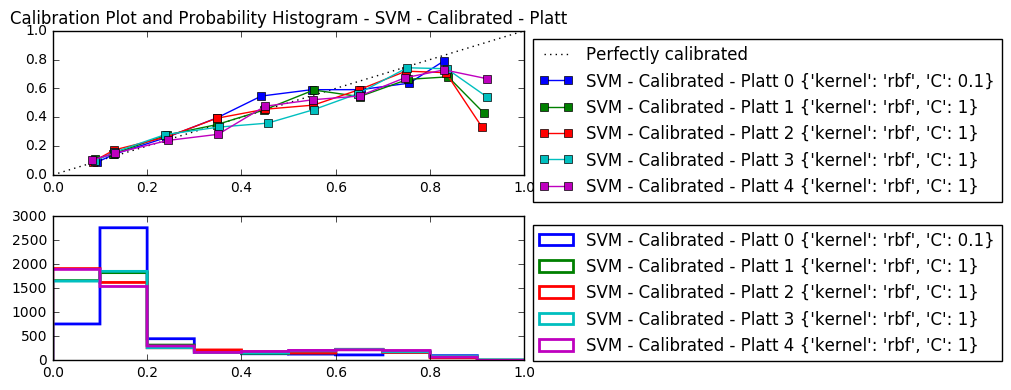

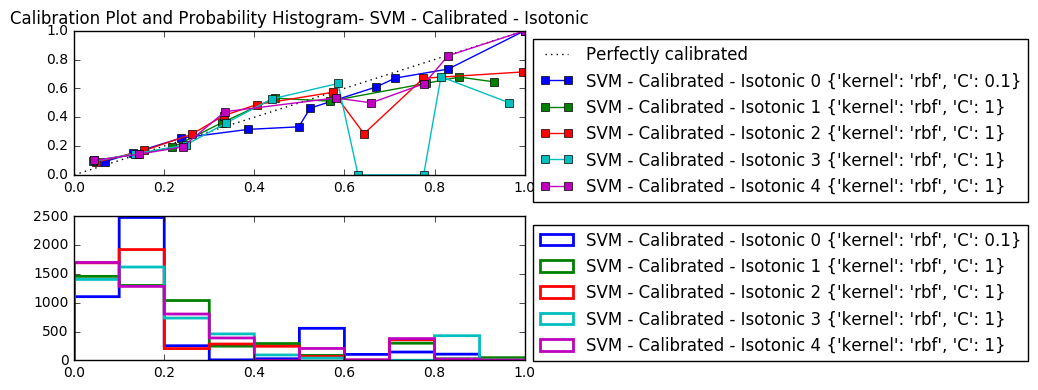

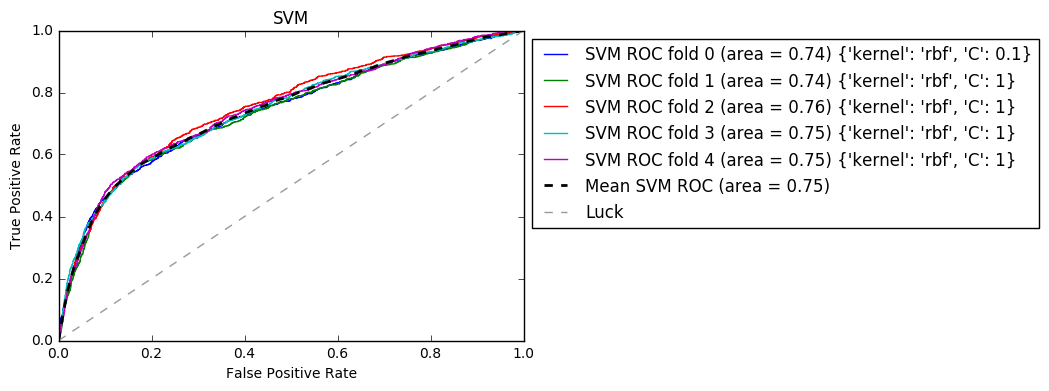

In [66]:
#Start cross validation and draw the ROC curves
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

#The first plot will display the Calibration Plot and Histogram
plt.figure(11)
plt.subplot(211)
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.xlim([0, 1])
plt.ylim([0, 1])

#The first plot will display the Calibration Plot and Histogram for 
#probabilities calibrated with Platt's method
plt.figure(12)
plt.subplot(211)
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.xlim([0, 1])
plt.ylim([0, 1])

#The first plot will display the Calibration Plot and Histogram for 
#probabilities calibrated with Isotonic regression
plt.figure(13)
plt.subplot(211)
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.xlim([0, 1])
plt.ylim([0, 1])

for i, (train, validation) in enumerate(cv):
    #Create an instance of the Support Vector Machines
    classifier_svm = svm.SVC(cache_size = 200, class_weight = 'balanced', coef0 = 0.0,
                             decision_function_shape = None, degree = 3, gamma = 'auto',
                             max_iter = -1, probability = True, random_state = 1, shrinking = True,
                             tol = 0.001, verbose = False) 
    #We will take 3,000 samples
    randomsample = np.random.randint(0,len(X_train_validation_scaled[train]),3000) 
                           
    #Create an instance of the grid search class
    grid = GridSearchCV(classifier_svm,hyper_parameters_svm,cv = 5, scoring = score_cost,refit = True)
    #Fit svm
    grid.fit(X_train_validation_scaled[train][randomsample],y_train_validation[train][randomsample])
    max_score = 0
    for params, mean_score, scores in grid.grid_scores_:
        print('%0.3f (+/-%0.03f) for %r' % (mean_score, scores.std() * 2, params))
        if mean_score > max_score:
            max_score = mean_score
    print('SVM ',i,'best parameters','true values %0.03f' % (sum(y_train_validation[train][randomsample])/len(y_train_validation[train][randomsample])))
    print(grid.best_params_,'max score',max_score)
    
    #Calibrate probabilities with Platt's method. This is equivalent to fitting a logistic regression to 
    #true class values in the traning set using the uncalibrated predicted probabilities
    probas_train = grid.predict_proba(X_train_validation_scaled[train][randomsample])[:,1]    
    lr.fit(probas_train.reshape( -1, 1 ),y_train_validation[train][randomsample])    

    #Calibrate probabilities with isotonic regression. Isotonic regression fits a 
    #non-decreasing function to the data
    ir.fit(probas_train,y_train_validation[train][randomsample])
    
    #Predict the test set in the current fold
    #Index 1 includes the probabilities of belonging to class '1' (delayed)
    probas_validation = grid.predict_proba(X_train_validation_scaled[validation])[:,1]
    #Calculate the calibrated probabilities with Platt's method    
    probas_calibrated_platt = lr.predict_proba(probas_validation.reshape( -1, 1 ))[:,1]
    
    #Calculate the calibrated probabilities with isotonic regression
    probas_calibrated_isotonic = ir.transform(probas_validation)     

    #Plot the calibration curves
    fraction_of_positives, mean_predicted_value = calibration_curve(y_train_validation[validation], probas_validation, n_bins=10)
    #Plot the calibration curves for calibrated probabilities platt
    fraction_of_positives_calibrated_platt, mean_predicted_value_calibrated_platt = calibration_curve(y_train_validation[validation], probas_calibrated_platt, n_bins=10)
    #Plot the calibration curves for calibrated probabilities isotonic
    fraction_of_positives_calibrated_isotonic, mean_predicted_value_calibrated_isotonic = calibration_curve(y_train_validation[validation], probas_calibrated_isotonic, n_bins=10)
            
    # Compute ROC curve and the area under the curve
    fpr, tpr, thresholds = roc_curve(y_train_validation[validation], probas_validation)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.figure(14)    
    plt.plot(fpr, tpr, lw=1, label='SVM ROC fold %d (area = %0.2f) %r' % (i, roc_auc,grid.best_params_))

    plt.figure(11)
    plt.subplot(211)
    plt.plot(mean_predicted_value,fraction_of_positives,"s-",label = 'SVM %d %r' % (i,grid.best_params_))
    plt.subplot(212)
    plt.hist(probas_validation,range=(0,1),bins= 10, label = "SVM %d %r" % (i,grid.best_params_),histtype = "step", lw = 2)

    plt.figure(12)    
    plt.subplot(211)
    plt.plot(mean_predicted_value_calibrated_platt,fraction_of_positives_calibrated_platt,"s-",label = 'SVM - Calibrated - Platt %d %r' % (i,grid.best_params_))
    plt.subplot(212)
    plt.hist(probas_calibrated_platt,range=(0,1),bins= 10, label = "SVM - Calibrated - Platt %d %r" % (i,grid.best_params_),histtype = "step", lw = 2)
    
    plt.figure(13)    
    plt.subplot(211)
    plt.plot(mean_predicted_value_calibrated_isotonic,fraction_of_positives_calibrated_isotonic,"s-",label = 'SVM - Calibrated - Isotonic %d %r' % (i,grid.best_params_))
    plt.subplot(212)
    plt.hist(probas_calibrated_isotonic,range=(0,1),bins= 10, label = "SVM - Calibrated - Isotonic %d %r" % (i,grid.best_params_),histtype = "step", lw = 2)
       
#Draw the mean ROC curve
plt.figure(14)    
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',label='Mean SVM ROC (area = %0.2f)' % mean_auc, lw=2)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.title('SVM')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.savefig('Mean SVM ROC')

plt.figure(11)
plt.subplot(211)
plt.title('Calibration Plot and Histogram - SVM')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.subplot(212)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.tight_layout()
plt.savefig('Calibration Plot and Histogram - SVM')

plt.figure(12)
plt.subplot(211)
plt.title('Calibration Plot and Probability Histogram - SVM - Calibrated - Platt')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.subplot(212)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.tight_layout()
plt.savefig('Calibration Plot and Histogram - SVM - Calibrated - Platt')

plt.figure(13)
plt.subplot(211)
plt.title('Calibration Plot and Probability Histogram- SVM - Calibrated - Isotonic')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.subplot(212)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.tight_layout()
plt.savefig('Calibration Plot and Histogram - SVM - Calibrated - Isotonic')

In [67]:
#We are going to use a radial basis function as the kernel, and set C to 1
classifier_svm = svm.SVC(cache_size = 200, class_weight = 'balanced', coef0 = 0.0, kernel = 'rbf',
                         decision_function_shape = None, degree = 3, gamma = 'auto',C = 1,
                         max_iter = -1, probability = True, random_state = 1, shrinking = True,
                         tol = 0.001, verbose = False) 

In [68]:
#Use the train and validation data to fit the model with the optimal parameter
classifier_svm.fit(X_train_validation_scaled,y_train_validation) 

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
  verbose=False)

In [69]:
#Get training probabilities for probability calibration
probabilities_train = classifier_svm.predict_proba(X_train_validation_scaled)[:,1]
#calibrate probabilities with isotonic regression
ir.fit(probabilities_train,y_train_validation)                          
#calibrate probabilities with platt's method
lr.fit(probabilities_train.reshape( -1, 1 ),y_train_validation) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
#Scale the test data
X_test_scaled = preprocessing.scale(X_test)
#Use the SVM model on the test set and get uncalibrated probabilities
probabilities_test = classifier_svm.predict_proba(X_test_scaled)[:,1]
#Use the cost sensitive threshold to predict the outcome
predictions_test_cost = [0 if x < threshold_cost else 1 for x in probabilities_test]
#Use the 50% threshold to predict the outcome
predictions_test_50 = [0 if x < threshold_05 else 1 for x in probabilities_test]
#Calibrate the probabilities by isotonic regression 
probas_calibrated_isotonic = ir.transform(probabilities_test)
#Use the cost sensitive threshold to predict the outcome
predictions_test_calibrated_isotonic_cost = [0 if x < threshold_cost else 1 for x in probas_calibrated_isotonic]
#Use the 50% threshold to predict the outcome
predictions_test_calibrated_isotonic_50 = [0 if x < threshold_05 else 1 for x in probas_calibrated_isotonic]
#Calibrate the probabilities by isotonic regression 
probas_calibrated_platt = lr.predict_proba(probabilities_test.reshape( -1, 1 ))[:,1]
#Use the cost sensitive threshold to predict the outcome
predictions_test_calibrated_platts_cost = [0 if x < threshold_cost else 1 for x in probas_calibrated_platt]
#Use the 50% threshold to predict the outcome
predictions_test_calibrated_platts_50 = [0 if x < threshold_05 else 1 for x in probas_calibrated_platt]

In [71]:
#Print the expected cost and the classification report for uncalibrated probabilities, 
#isotonic calibrated probabilities and platts calibrated probabilities
#with cost-sensitive threshold and 50% threshold
print('Uncalibrated probabilities, cost sensitive threshold: %i ' % expected_cost(y_test, predictions_test_cost))
print(classification_report(y_test, predictions_test_cost,target_names = ['Pay','Default']))
print('Uncalibrated probabilities, 50pct threshold: %i ' % expected_cost(y_test, predictions_test_50))
print(classification_report(y_test, predictions_test_50,target_names = ['Pay','Default']))
print('Isotonic calibrated probabilities, cost sensitive threshold: %i ' % expected_cost(y_test, predictions_test_calibrated_isotonic_cost))
print(classification_report(y_test, predictions_test_calibrated_isotonic_cost,target_names = ['Pay','Default']))
print('Isotonic calibrated probabilities, 50pct threshold: %i ' % expected_cost(y_test, predictions_test_calibrated_isotonic_50))
print(classification_report(y_test, predictions_test_calibrated_isotonic_50,target_names = ['Pay','Default']))
print('Platts calibrated probabilities, cost sensitive threshold: %i ' % expected_cost(y_test, predictions_test_calibrated_platts_cost))
print(classification_report(y_test, predictions_test_calibrated_platts_cost,target_names = ['Pay','Default']))
print('Platts calibrated probabilities, 50pct threshold: %i ' % expected_cost(y_test, predictions_test_calibrated_platts_50))
print(classification_report(y_test, predictions_test_calibrated_platts_50,target_names = ['Pay','Default']))
print('Dummy classifier: %i ' % expected_cost(y_test, clf_predictions))
print(classification_report(y_test, clf_predictions,target_names = ['Pay','Default']))

Uncalibrated probabilities, cost sensitive threshold: 2133 
             precision    recall  f1-score   support

        Pay       0.87      0.83      0.85      4663
    Default       0.49      0.56      0.52      1337

avg / total       0.78      0.77      0.78      6000

Uncalibrated probabilities, 50pct threshold: 2244 
             precision    recall  f1-score   support

        Pay       0.85      0.90      0.88      4663
    Default       0.57      0.44      0.50      1337

avg / total       0.79      0.80      0.79      6000

Isotonic calibrated probabilities, cost sensitive threshold: 2137 
             precision    recall  f1-score   support

        Pay       0.87      0.83      0.85      4663
    Default       0.48      0.56      0.52      1337

avg / total       0.78      0.77      0.77      6000

Isotonic calibrated probabilities, 50pct threshold: 2372 
             precision    recall  f1-score   support

        Pay       0.84      0.93      0.88      4663
    Default 

The smallest cost is given by using probabilities calibrated with Platt's method and a cost-sensitive threshold. The calibration plots suggest that the probabilities adjusted with the Platt's method are closer to observed probabilities. The dummy classifier which predicts 'payment' for all instances (assigns the majority class) has the highest cost.

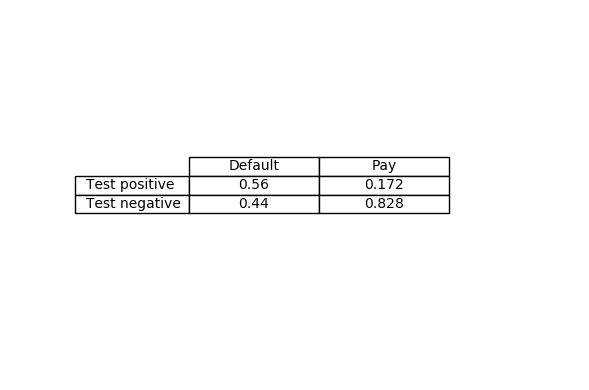

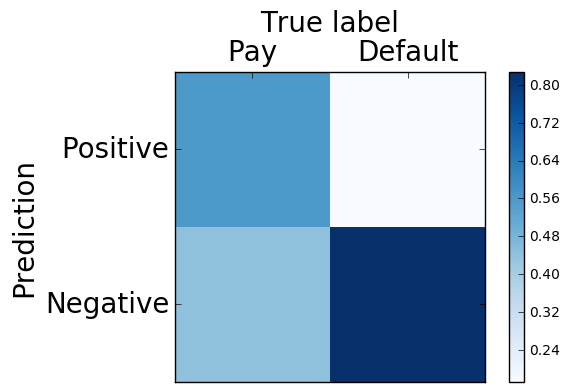

In [72]:
#Plot the confusion matrix 
cm = confusion_matrix_custom(y_test,predictions_test_calibrated_isotonic_cost)
cm = np.round(cm, decimals = 3)
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
ax.table(cellText=cm,
          rowLabels=['Test positive','Test negative'],
          colLabels=['Default','Pay'],
          cellLoc='center',colWidths=[0.25, 0.25],
          loc='center')
plt.tight_layout()

fig, ax = plt.subplots()
im = ax.imshow(cm, cmap=plt.cm.Blues, interpolation='none')
fig.colorbar(im)
locs = np.arange(len(np.unique(y_test)))
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks(locs + 0.5)
ax.xaxis.set(ticks=locs, ticklabels=['Pay','Default'])
ax.yaxis.set_ticks(locs + 0.5)
ax.yaxis.set(ticks=locs, ticklabels=['Positive','Negative'])
plt.xlabel('True label', fontsize=20)
plt.ylabel('Prediction', fontsize=20)
plt.tick_params(axis='both', labelsize=20)
plt.tight_layout()
ax.grid(False)